In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys

import haiku as hk
import tensorflow as tf
import tensorflow_datasets as tfds

import jax
import jax.numpy as np

from jax import random
from jax import grad, jit, vmap

import numpy as onp

from IPython import display
from matplotlib import pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = ((10, 7.5))

In [5]:
key = random.PRNGKey(0)

/Users/amrmkayid/anaconda3/envs/kayai/lib/python3.6/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


# 3.5.1. Getting the Dataset

In [19]:
mnist_train, info = tfds.load('fashion_mnist', split='train', shuffle_files=True, with_info=True)

In [20]:
mnist_test = tfds.load('fashion_mnist', split='test', shuffle_files=True)

In [21]:
mnist_train, mnist_test

(<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>)

In [30]:
info.splits['train'].num_examples, info.splits['test'].num_examples

(60000, 10000)

In [41]:
def get_fashion_mnist_labels(examples):
    return [info.features['label'].int2str(ex['label']) for ex in examples]

In [56]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [53]:
examples = [ex for ex in tfds.as_numpy(mnist_train)]

In [57]:
data = examples[:18]
imgs = np.array([ex['image'] for ex in data])

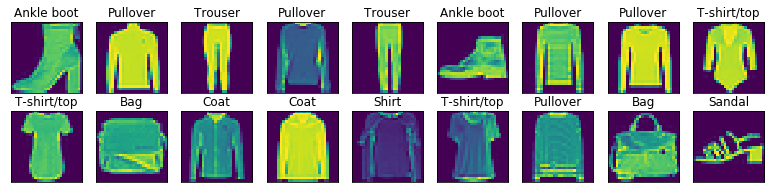

In [58]:
show_images(imgs.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(data));

# 3.5.3. Putting All Things Together

In [60]:
batch_size = 256

In [61]:
ds_train = mnist_train.shuffle(info.splits['train'].num_examples)
ds_train = mnist_train.batch(batch_size)

In [66]:
def load_data_fashion_mnist(batch_size):
    mnist_train, info = tfds.load('fashion_mnist', split='train', shuffle_files=True, with_info=True)
    mnist_test = tfds.load('fashion_mnist', split='test', shuffle_files=True)
    
    return (mnist_train.shuffle(info.splits['train'].num_examples).batch(batch_size),
           mnist_test.batch(batch_size))

In [73]:
ds_train, ds_test = load_data_fashion_mnist(32)

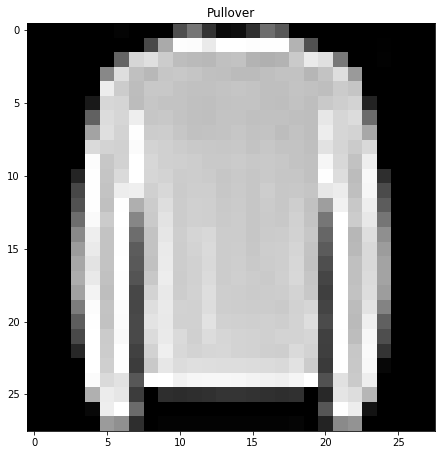

In [89]:
for example in ds_train.take(1):  # Only take a single example
    image, label = example["image"], example["label"]
    plt.imshow(image[0].numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.title(info.features['label'].int2str(label[0].numpy()))